# Linear Regression Assignment

## Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.


### The Steps we will follow in the entire excercise:-

1. Reading, understanding and visualising the data.
2. Preparing the data for modelling.
3. Training the model.
4. Residual Analysis.
5. Prediction and evaluation on the test set.

## Step 1: Reading, understanding and visualising the data.

In [1]:
# import necessary modules and classes to be used for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

### Step 1a: Reading dataset from csv to dataframe car_df

In [2]:
# Read the dataset as dataframe car_df
car_df = pd.read_csv("CarPrice_Assignment.csv")
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Step 1b: Determine basic information regarding dataset

In [3]:
# Find basic information regarding dataset - Understanding the dataset
print("Shape:")
print(car_df.shape)
print("\n---------------------------------------\n")
print("Info:")
print(car_df.info())
print("\n---------------------------------------\n")
print(car_df.describe())


Shape:
(205, 26)

---------------------------------------

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-

Thus from above we can see that there in no null values.


Total number of row - 205


Total columns - 26

### Visualisation of Data using cluster plot.

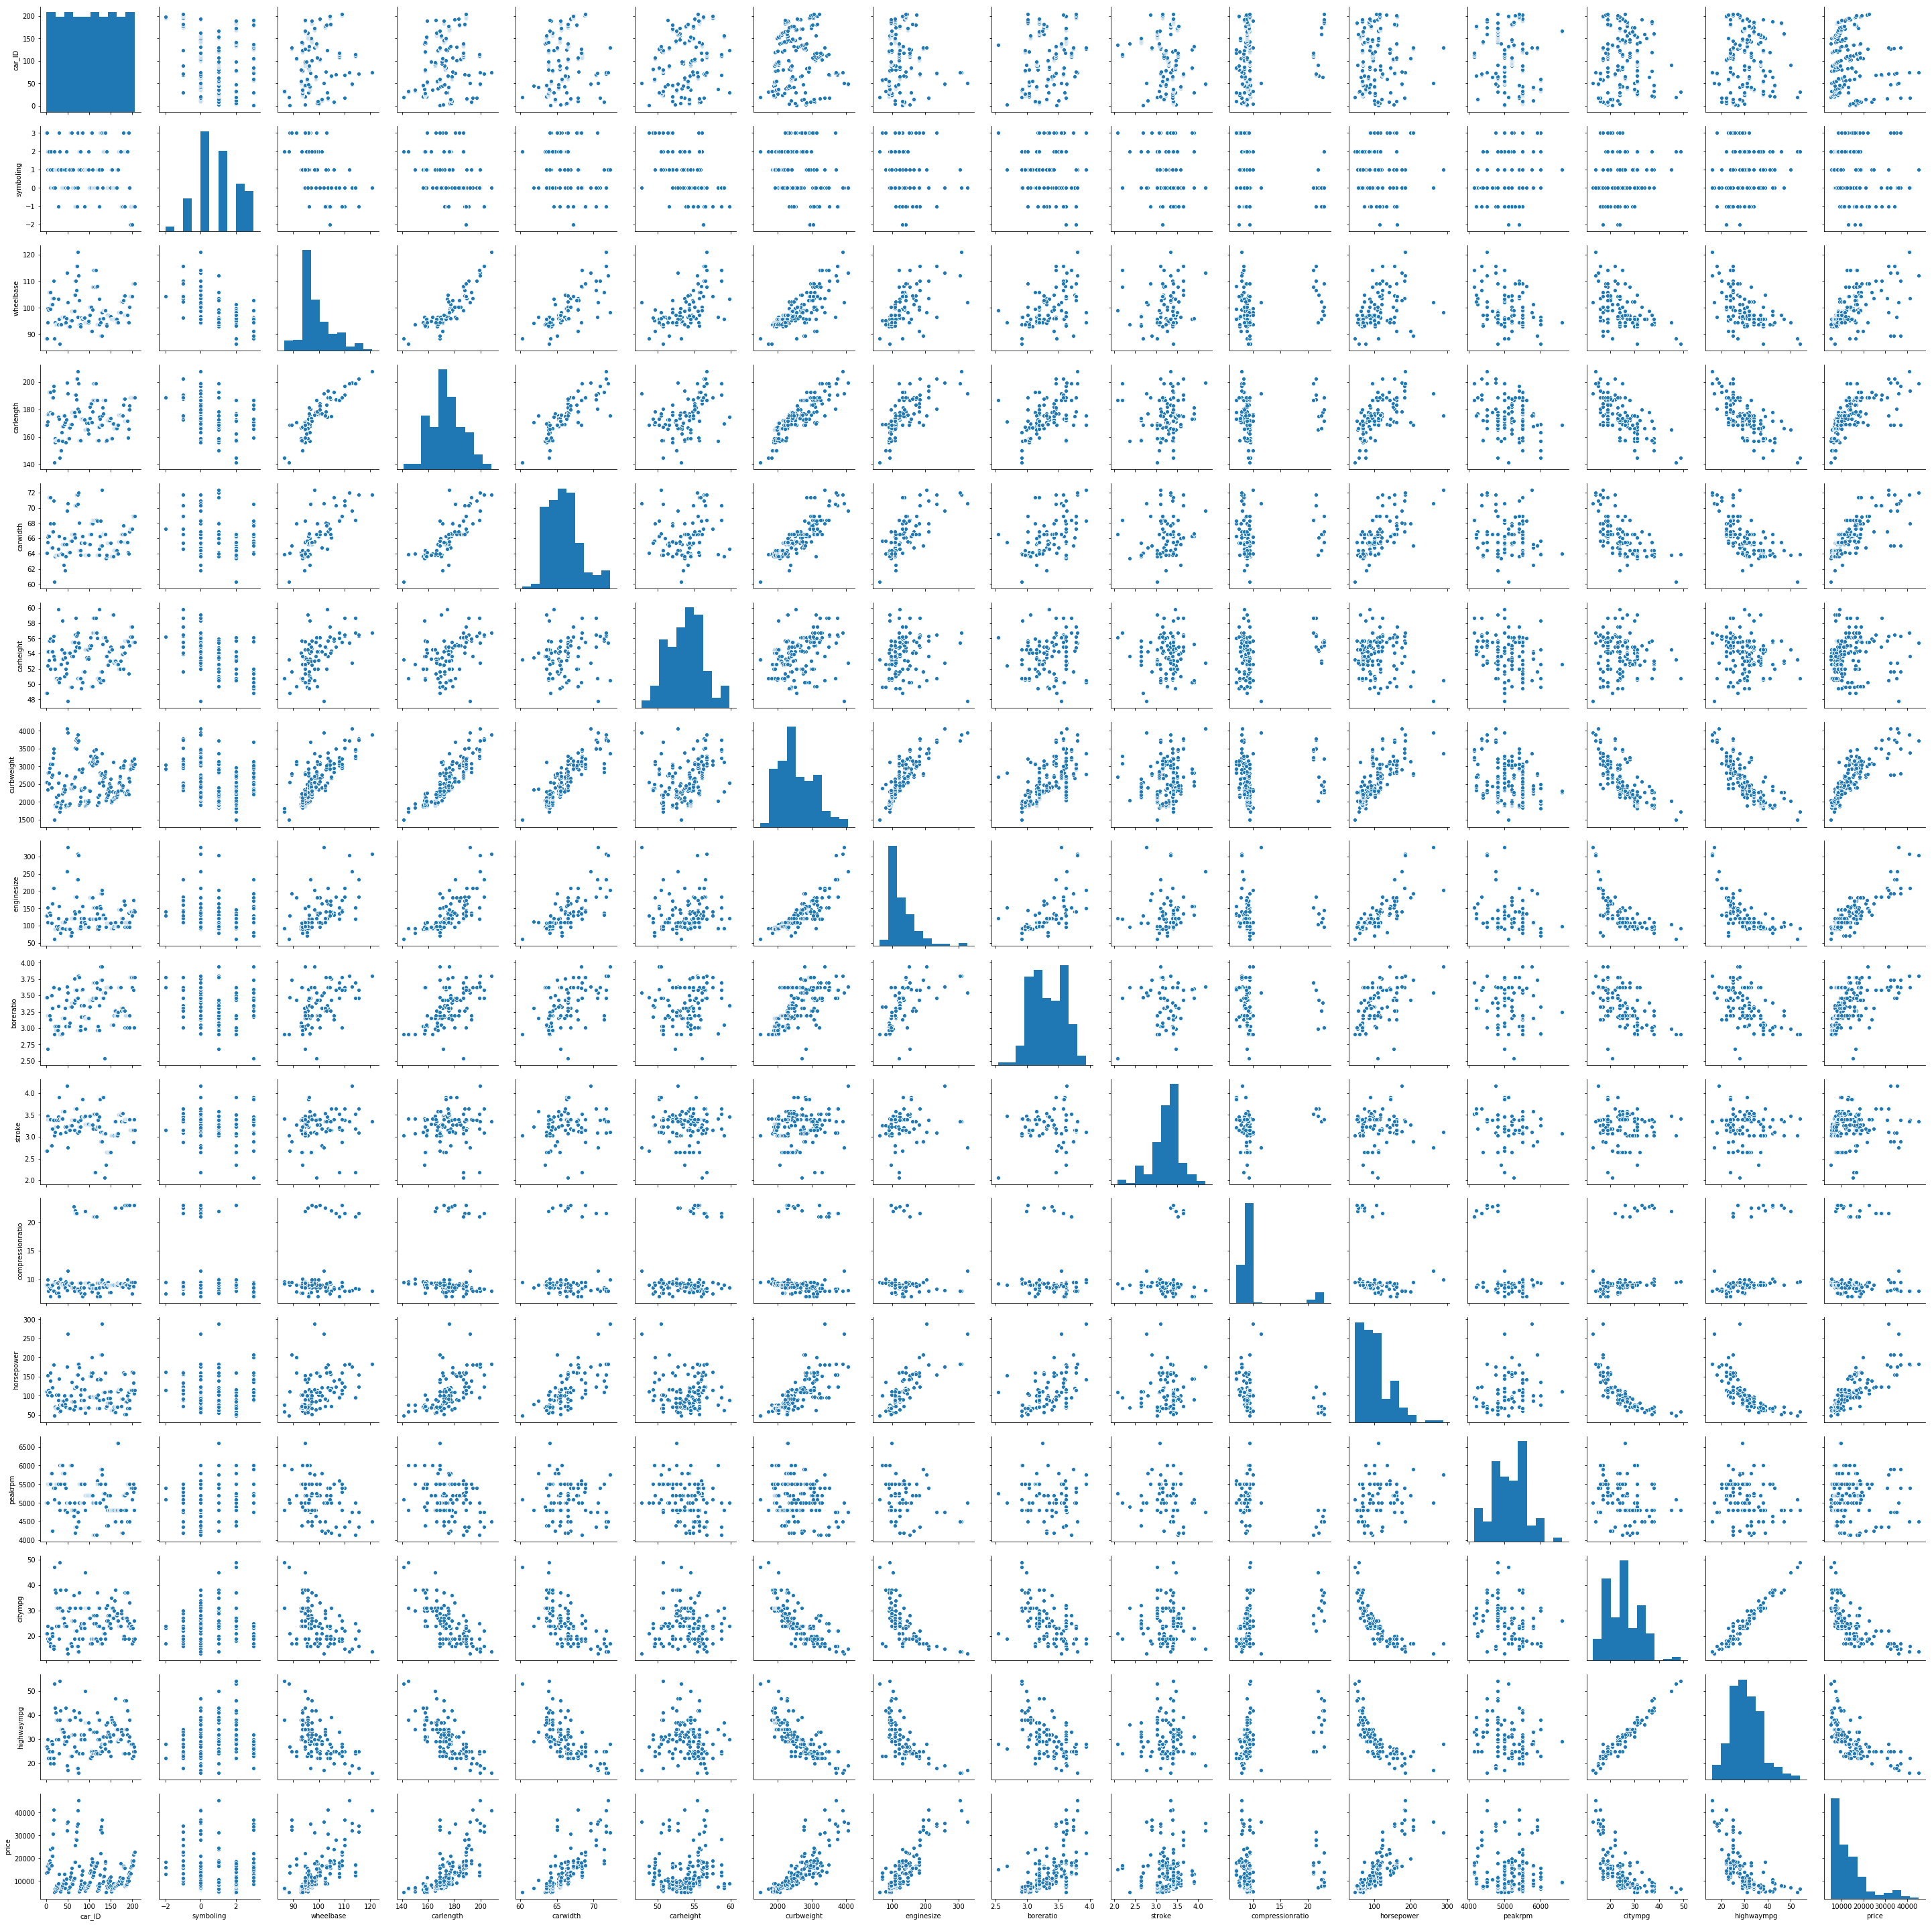

In [4]:
# visualisation of numerical dataset for various variables against price.
sns.pairplot(car_df)
plt.show()

In [5]:
# Drop car_ID as it is of no use in analysis of price and is always unique.
print(len(car_df.car_ID.unique().tolist()))
car_df.drop(['car_ID'], axis=1, inplace=True)
car_df.shape

205


(205, 25)

In [6]:
# Divide car make and car model. 
# Also since car models are unique we can drop car model and keep company name only.
car_df['CarName'] = car_df['CarName'].apply(lambda x: x.split(' ')[0])
car_df.CarName.value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
vw              2
maxda           2
renault         2
Nissan          1
toyouta         1
vokswagen       1
mercury         1
porcshce        1
Name: CarName, dtype: int64

In [7]:
# Change the incorrect name to correct names in dataframe for CarName
car_df['CarName'] = car_df['CarName'].replace({'toyouta': 'toyota', 
                                           'vokswagen': 'volkswagen', 
                                           'porcshce': 'porsche', 
                                           'Nissan': 'nissan', 
                                           'vw': 'volkswagen',
                                           'maxda': 'mazda'})
car_df.CarName.value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
alfa-romero     3
chevrolet       3
renault         2
mercury         1
Name: CarName, dtype: int64

### Visualising the categorical variables using boxplot.
Since Carname contains multiple entries we need to group them on the basis of Company Name and discrad model name from CarName entry.


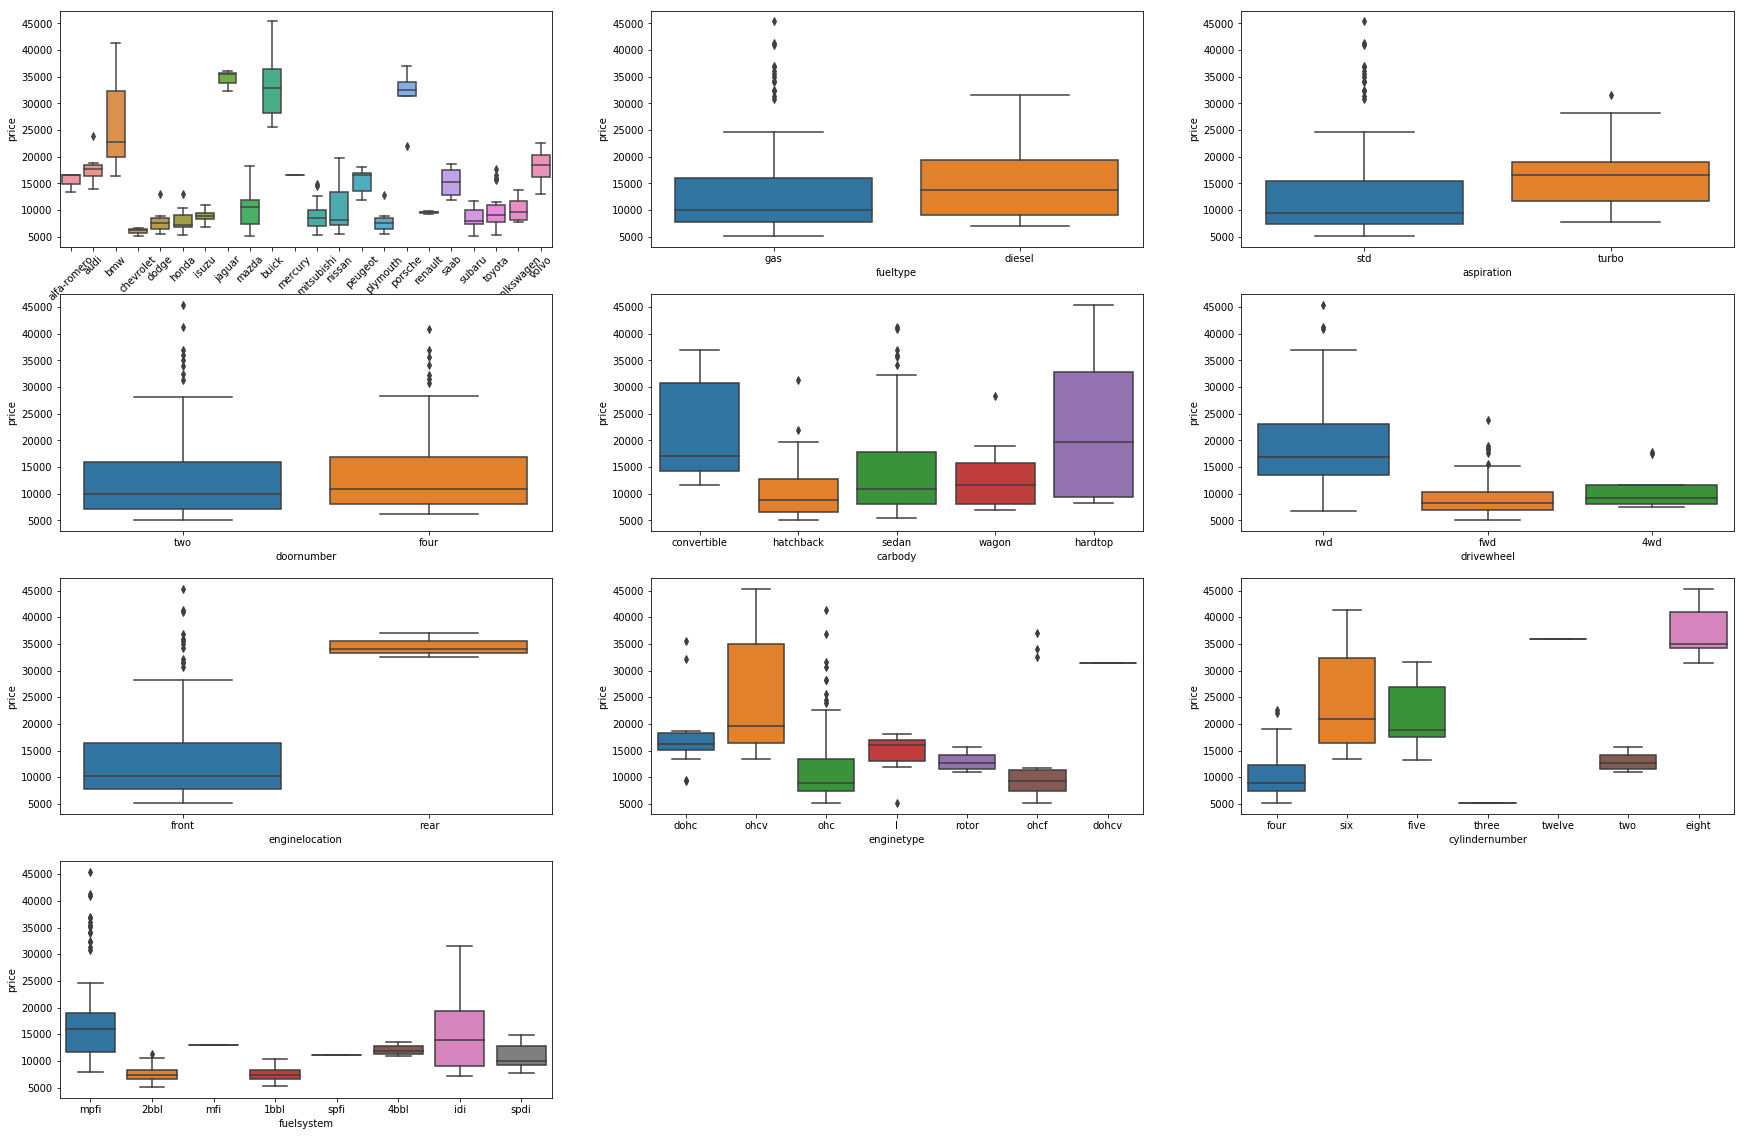

In [8]:
# visualising the categorical variables
plt.figure(figsize=(30,20))
plt.subplot(4,3,1)
plt.xticks(rotation=45)
sns.boxplot(x='CarName',y='price',data=car_df)
plt.subplot(4,3,2)
sns.boxplot(x='fueltype',y='price',data=car_df)
plt.subplot(4,3,3)
sns.boxplot(x='aspiration',y='price',data=car_df)
plt.subplot(4,3,4)
sns.boxplot(x='doornumber',y='price',data=car_df)
plt.subplot(4,3,5)
sns.boxplot(x='carbody',y='price',data=car_df)
plt.subplot(4,3,6)
sns.boxplot(x='drivewheel',y='price',data=car_df)
plt.subplot(4,3,7)
sns.boxplot(x='enginelocation',y='price',data=car_df)
plt.subplot(4,3,8)
sns.boxplot(x='enginetype',y='price',data=car_df)
plt.subplot(4,3,9)
sns.boxplot(x='cylindernumber',y='price',data=car_df)
plt.subplot(4,3,10)
sns.boxplot(x='fuelsystem',y='price',data=car_df)
plt.show()

## Step 2: Preparing Data for Modelling

### Step 2a: Remove data with high price i.e., greater than 40000 and remove car_ID as this field will have unique value only.



In [9]:
# Drop rows for price greated than 35000
indexNames = car_df[(car_df['price'] > 40000)].index
car_df.drop(indexNames, inplace=True)
car_df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0



### Step 2b: Convert categorical variables to numerical representation.

In [10]:
# Convert categorical fields to numerical representation.
# Convert columns with number in alphabet like doornumber and cylindernumber
convert_numbers = {'doornumber': {'two': 2, 'four': 4}, 
                   'cylindernumber': {'two': 2, 'three': 3, 'four': 4,
                                      'five': 5, 'six': 6, 'eight': 8,
                                      'twelve': 12}}
car_df.replace(convert_numbers, inplace = True)
car_df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
# Convert categorical variables with two different values.
# fueltype, aspiration, enginelocation

# categorical variable fueltype
dummy_df = pd.get_dummies(car_df['fueltype'], prefix='fueltype')
# concate the dummy df with car_df
car_df = pd.concat([car_df, dummy_df], axis=1)
# Now drop the original columns as they are no longer required.
car_df.drop(['fueltype'], axis=1, inplace=True)

# categorical variable aspiration
dummy_df = pd.get_dummies(car_df['aspiration'], prefix='aspiration')
# concate the dummy df with car_df
car_df = pd.concat([car_df, dummy_df], axis=1)
# Now drop the original columns as they are no longer required.
car_df.drop(['aspiration'], axis=1, inplace=True)


# categorical variable enginelocation
dummy_df = pd.get_dummies(car_df['enginelocation'], 
                          prefix='enginelocation')
# concate the dummy df with car_df
car_df = pd.concat([car_df, dummy_df], axis=1)
# Now drop the original columns as they are no longer required.
car_df.drop(['enginelocation'], axis=1, inplace=True)

# Shape of dataframe after converting.
car_df.shape

(202, 28)

In [12]:
# Convert categorical variables with more than two different values.
# carbody, drivewheel

# categorical variable carbody
dummy_df = pd.get_dummies(car_df['carbody'], 
                          prefix='carbody', drop_first=True)
# concatenate the dummy df with car_df
car_df = pd.concat([car_df, dummy_df], axis=1)
# Now drop the original columns as they are no longer required.
car_df.drop(['carbody'], axis=1, inplace=True)


# categorical variable drivewheel
dummy_df = pd.get_dummies(car_df['drivewheel'], 
                          prefix='drivewheel', drop_first=True)
# concatenate the dummy df with car_df
car_df = pd.concat([car_df, dummy_df], axis=1)
# Now drop the original columns as they are no longer required.
car_df.drop(['drivewheel'], axis=1, inplace=True)

# Shape of dataframe after converting.
car_df.shape

(202, 32)

In [13]:
# Determine enginetype counts
car_df.enginetype.value_counts()

ohc      147
ohcf      15
dohc      12
l         12
ohcv      11
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [14]:
# Drop rows for rotor and dohcv type as they have only 4 and 1 rows respectivley which are insignificant.
indexNames = car_df[(car_df['enginetype'] == 'dohcv') | (car_df['enginetype'] == 'rotor')].index
car_df.drop(indexNames, inplace=True)

# Shape of dataframe after converting.
car_df.shape

(197, 32)

In [15]:
# Convert engine type from categorical to numerical representation.
# categorical variable enginetype
dummy_df = pd.get_dummies(car_df['enginetype'], 
                          prefix='enginetype')
# concatenate the dummy df with car_df
car_df = pd.concat([car_df, dummy_df], axis=1)
# Now drop the original columns as they are no longer required.
car_df.drop(['enginetype'], axis=1, inplace=True)


# Shape of dataframe after converting.
car_df.shape

(197, 36)

In [16]:
# Convert categorical fuelsystem. Identify different values for variable.
car_df.fuelsystem.value_counts()

mpfi    89
2bbl    66
idi     20
1bbl    11
spdi     9
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

In [17]:
# Change mfi to mpfi in fuelsystem
car_df['fuelsystem'] = car_df['fuelsystem'].replace({'mfi': 'mpfi'})

# Drop rows for spfi type as they have insignificant data.
indexNames = car_df[(car_df['fuelsystem'] == 'spfi')].index
car_df.drop(indexNames, inplace=True)


In [18]:
# categorical variable fuelsystem to numerical representation.
dummy_df = pd.get_dummies(car_df['fuelsystem'], 
                          prefix='fuelsystem')
# concatenate the dummy df with car_df
car_df = pd.concat([car_df, dummy_df], axis=1)
# Now drop the original columns as they are no longer required.
car_df.drop(['fuelsystem'], axis=1, inplace=True)


# Shape of dataframe after converting.
car_df.shape

(196, 40)

In [19]:
# We can drop CarName as new company will not predict data based on existing brand names.
car_df.drop(['CarName'], axis=1, inplace=True)

In [20]:
# Shape of dataframe after categorical data is converted to numerical representation.
print(car_df.shape)

# Dataframe values.
car_df.head()

(196, 39)


,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,1,0,0,0,0,0,0,0,1,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,1,0,0,0,0,0,0,0,1,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,0,0,0,1,0,0,0,1,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,1,0,0,0,0,0,1,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,1,0,0,0,0,0,1,0


## Step 3: Training the model

### Step 3a: Splitting the Data into Training and Testing Sets

In [21]:
# We specify this so that the train and test data set always have the same rows, respectively

car_df_train, car_df_test = train_test_split(car_df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Step 3b: Rescaling the Features 

We will use MinMax scaling.

In [22]:
scaler = MinMaxScaler()

# Apply scaler() to all the columns
# Find out list of variable to apply scaler
num_vars = list(car_df.columns)


In [23]:
# Apply scaler() to list of variables.
car_df_train[num_vars] = scaler.fit_transform(car_df_train[num_vars])
car_df_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi
81,1.0,0.0,0.351449,0.545299,0.459459,0.133333,0.325834,0.111111,0.230189,0.609091,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.8,1.0,0.478261,0.606838,0.531532,0.541667,0.329325,0.111111,0.181132,0.463636,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
190,1.0,0.0,0.286232,0.420513,0.333333,0.300000,0.284329,0.111111,0.181132,0.463636,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27,0.6,0.0,0.257246,0.276923,0.315315,0.233333,0.272692,0.111111,0.139623,0.318182,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
97,0.6,1.0,0.286232,0.497436,0.315315,0.475000,0.212956,0.111111,0.135849,0.427273,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Step 3c: Create heatmap of the dataframe.

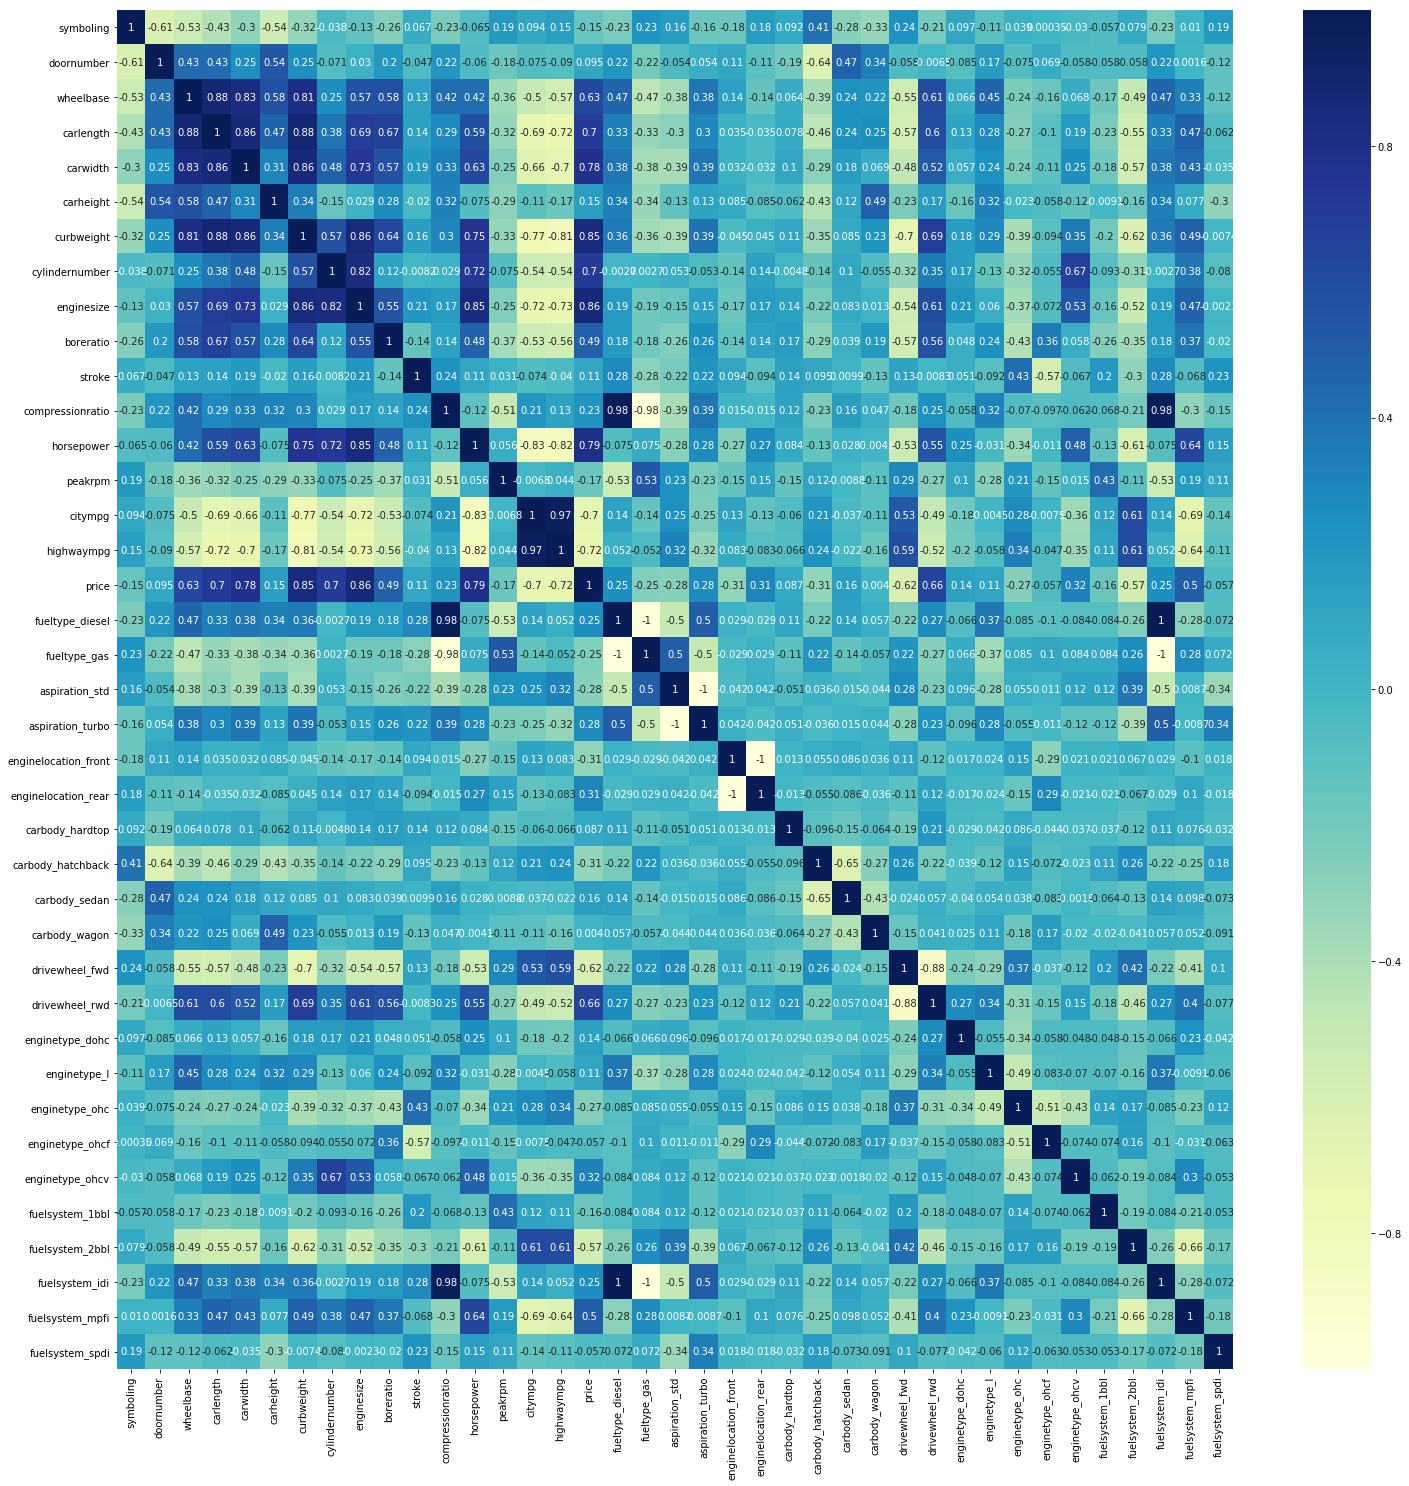

In [24]:
# heatmap
plt.figure(figsize = (25,25))
sns.heatmap(car_df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

### Step 3d: Dividing into X and Y sets for the model building

In [25]:
y_train = car_df_train.pop('price')
X_train = car_df_train

### Step 3e: Building our model using RFE (Recursive Feature Elimination)

In [26]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [27]:
# Determine significant columns for RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 5),
 ('doornumber', False, 16),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 7),
 ('curbweight', True, 1),
 ('cylindernumber', False, 12),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', False, 4),
 ('citympg', False, 17),
 ('highwaympg', True, 1),
 ('fueltype_diesel', False, 2),
 ('fueltype_gas', True, 1),
 ('aspiration_std', False, 13),
 ('aspiration_turbo', False, 11),
 ('enginelocation_front', True, 1),
 ('enginelocation_rear', True, 1),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 18),
 ('drivewheel_rwd', True, 1),
 ('enginetype_dohc', False, 9),
 ('enginetype_l', False, 10),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', False, 8),
 ('fuelsystem_1bbl', False, 14),
 ('fuelsystem

In [28]:
# Top 20 predictive variables tha are selected for training model
col = X_train.columns[rfe.support_]
col

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'highwaympg',
       'fueltype_gas', 'enginelocation_front', 'enginelocation_rear',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_rwd', 'enginetype_ohc', 'enginetype_ohcf'],
      dtype='object')

In [29]:
# Variables that are not consider for model training
X_train.columns[~rfe.support_]

Index(['symboling', 'doornumber', 'carheight', 'cylindernumber', 'peakrpm',
       'citympg', 'fueltype_diesel', 'aspiration_std', 'aspiration_turbo',
       'drivewheel_fwd', 'enginetype_dohc', 'enginetype_l', 'enginetype_ohcv',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_idi',
       'fuelsystem_mpfi', 'fuelsystem_spdi'],
      dtype='object')

### Step 3f: Building model using statsmodel, for the detailed statistics

In [30]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     76.55
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           9.00e-57
Time:                        17:07:08   Log-Likelihood:                 195.14
No. Observations:                 137   AIC:                            -350.3
Df Residuals:                     117   BIC:                            -291.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1958 

In [31]:
# Determine VIF of the independent variable
# Dropping const used for calculation
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,enginelocation_front,1195.20
10,fueltype_gas,75.22
7,compressionratio,74.27
3,curbweight,23.05
15,carbody_sedan,20.06
14,carbody_hatchback,15.08
1,carlength,12.63
16,carbody_wagon,11.94
12,enginelocation_rear,11.05
4,enginesize,10.78


### Start building model by removing variables that are not required -
We can remove variables with:

- High p-value, high VIF
- High-low:
  - High p, low VIF - remove these first
  - Low p, high VIF - remove thes after the ones above.
- Low p, low VIF

### Iteration 1: Remove variable enginelocation_front as both p value and VIF high.

In [32]:
# Remove variable with high p value and high VIF.

# enginelocation_front is insignificant as p value is high and can be dropped
X_train_new = X_train_rfe.drop(["enginelocation_front"], axis = 1)

In [33]:
# Rebuilding model after removing variable

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())                     # Summary of our linear model after dropping variable.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     76.55
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           9.00e-57
Time:                        17:07:08   Log-Likelihood:                 195.14
No. Observations:                 137   AIC:                            -350.3
Df Residuals:                     117   BIC:                            -291.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1096    

In [34]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,fueltype_gas,105.44
1,carlength,102.90
3,curbweight,93.00
2,carwidth,63.58
0,wheelbase,54.19
9,highwaympg,47.66
14,carbody_sedan,40.36
4,enginesize,30.12
7,compressionratio,28.13
5,boreratio,26.73


### Iteration 2: Remove variable fueltype_gas as both p value and VIF high.

In [35]:
# fueltype_gas has both high p value and high VIF and can be dropped as well.
X_train_new = X_train_new.drop(["fueltype_gas"], axis = 1)

In [36]:
# Rebuilding model after removing variable

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())                     # Summary of our linear model after dropping variable.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     80.60
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           1.78e-57
Time:                        17:07:09   Log-Likelihood:                 194.44
No. Observations:                 137   AIC:                            -350.9
Df Residuals:                     118   BIC:                            -295.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0798    

In [37]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carlength,97.96
3,curbweight,88.00
2,carwidth,62.33
0,wheelbase,52.04
13,carbody_sedan,37.13
4,enginesize,29.78
5,boreratio,26.32
8,horsepower,25.99
6,stroke,25.42
9,highwaympg,20.53


### Iteration 3: Remove variablecompressionratio as p value high.

In [38]:
# compressionratio has high p value
X_train_new = X_train_new.drop(["compressionratio"], axis = 1)

In [39]:
# Rebuilding model after removing variable

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())                     # Summary of our linear model after dropping variable

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     85.45
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           2.78e-58
Time:                        17:07:09   Log-Likelihood:                 193.99
No. Observations:                 137   AIC:                            -352.0
Df Residuals:                     119   BIC:                            -299.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0538    

In [40]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carlength,96.04
3,curbweight,81.65
2,carwidth,61.62
0,wheelbase,50.36
12,carbody_sedan,36.06
4,enginesize,29.58
5,boreratio,25.31
6,stroke,24.22
7,horsepower,21.78
8,highwaympg,19.01


### Iteration 4: Remove variable highwaympg as p value high.

In [41]:
# highwaympg has high p value
X_train_new = X_train_new.drop(["highwaympg"], axis = 1)

In [42]:
# Rebuilding model after removing variable

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())                     # Summary of our linear model after dropping variable.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     90.60
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           5.08e-59
Time:                        17:07:09   Log-Likelihood:                 193.32
No. Observations:                 137   AIC:                            -352.6
Df Residuals:                     120   BIC:                            -303.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0073    

In [43]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carlength,92.42
3,curbweight,80.36
2,carwidth,58.35
0,wheelbase,47.33
4,enginesize,28.40
5,boreratio,24.44
6,stroke,23.26
11,carbody_sedan,17.14
7,horsepower,15.01
14,enginetype_ohc,9.27


### Iteration 5: Remove variable horsepower as p value high.

In [44]:
# horsepower has high p value
X_train_new = X_train_new.drop(["horsepower"], axis = 1)

In [45]:
# Rebuilding model after removing variable

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())                     # Summary of our linear model after dropping variable

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     94.19
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           3.30e-59
Time:                        17:07:09   Log-Likelihood:                 191.18
No. Observations:                 137   AIC:                            -350.4
Df Residuals:                     121   BIC:                            -303.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0206    

In [46]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carlength,91.95
3,curbweight,75.70
2,carwidth,57.76
0,wheelbase,42.17
5,boreratio,24.40
4,enginesize,23.08
6,stroke,22.63
10,carbody_sedan,16.78
13,enginetype_ohc,9.27
9,carbody_hatchback,8.18


### Iteration 6: Remove variable carlength as VIF high.

In [47]:
#  carlength has high VIF value
X_train_new = X_train_new.drop(["carlength"], axis = 1)

In [48]:
# Rebuilding model after removing variable

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())                     # Summary of our linear model after dropping variable

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     97.53
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           3.38e-59
Time:                        17:07:09   Log-Likelihood:                 188.51
No. Observations:                 137   AIC:                            -347.0
Df Residuals:                     122   BIC:                            -303.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0200    

In [49]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,68.29
1,carwidth,51.50
0,wheelbase,39.97
3,enginesize,23.02
5,stroke,22.62
4,boreratio,20.61
9,carbody_sedan,15.14
12,enginetype_ohc,9.25
8,carbody_hatchback,8.04
10,carbody_wagon,5.96


### Iteration 7: Remove variable wheelbase as both p value and VIF high.

In [50]:
# wheelbase has high p value
X_train_new = X_train_new.drop(["wheelbase"], axis = 1)

In [51]:
# Rebuilding model after removing variable

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())                     # Summary of our linear model after dropping variable

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     103.3
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           1.28e-59
Time:                        17:07:09   Log-Likelihood:                 186.96
No. Observations:                 137   AIC:                            -345.9
Df Residuals:                     123   BIC:                            -305.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0450    

In [52]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,63.62
0,carwidth,38.10
4,stroke,22.52
3,boreratio,19.77
2,enginesize,19.74
8,carbody_sedan,12.76
11,enginetype_ohc,8.85
7,carbody_hatchback,7.52
9,carbody_wagon,5.09
10,drivewheel_rwd,4.40


### Iteration 8: Remove variable curbweight as VIF high.

In [53]:
# curbweight has high VIF value
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

In [54]:
# Rebuilding model after removing variable

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())                     # Summary of our linear model after dropping variable

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     96.28
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           8.42e-57
Time:                        17:07:10   Log-Likelihood:                 177.07
No. Observations:                 137   AIC:                            -328.1
Df Residuals:                     124   BIC:                            -290.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0428    

In [55]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,stroke,22.21
0,carwidth,21.65
2,boreratio,19.44
1,enginesize,13.20
7,carbody_sedan,12.74
10,enginetype_ohc,8.38
6,carbody_hatchback,7.52
8,carbody_wagon,4.60
9,drivewheel_rwd,3.84
11,enginetype_ohcf,3.35


### Iteration 9: Remove variable stroke as VIF high.

In [56]:
# stroke has high VIF value
X_train_new = X_train_new.drop(["stroke"], axis = 1)

In [57]:
# Rebuilding model after removing variable

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())                     # Summary of our linear model after dropping variable

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     102.8
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           4.25e-57
Time:                        17:07:10   Log-Likelihood:                 175.23
No. Observations:                 137   AIC:                            -326.5
Df Residuals:                     125   BIC:                            -291.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0686    

In [58]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,21.52
2,boreratio,19.19
1,enginesize,11.89
6,carbody_sedan,9.91
9,enginetype_ohc,7.62
5,carbody_hatchback,5.39
7,carbody_wagon,3.71
8,drivewheel_rwd,3.56
10,enginetype_ohcf,2.91
4,carbody_hardtop,1.67


### Iteration 10: Remove variable carwidth as VIF high.

In [59]:
# carwidth has high VIF value
X_train_new = X_train_new.drop("carwidth", axis = 1)

In [60]:
# Rebuilding model after removing variable

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())                     # Summary of our linear model after dropping variable

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     63.65
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           2.09e-44
Time:                        17:07:10   Log-Likelihood:                 140.52
No. Observations:                 137   AIC:                            -259.0
Df Residuals:                     126   BIC:                            -226.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0243    

In [61]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,boreratio,17.14
5,carbody_sedan,8.94
0,enginesize,7.95
8,enginetype_ohc,7.59
4,carbody_hatchback,5.08
7,drivewheel_rwd,3.56
6,carbody_wagon,3.44
9,enginetype_ohcf,2.86
3,carbody_hardtop,1.66
2,enginelocation_rear,1.39


### Iteration 11: Remove variable carbody_sedan as both p value and VIF high.

In [62]:
# carbody_sedan has high p value
X_train_new = X_train_new.drop("carbody_sedan", axis = 1)

In [63]:
# Rebuilding model after removing variable

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())                     # Summary of our linear model after dropping variable

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     70.03
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           6.05e-45
Time:                        17:07:10   Log-Likelihood:                 139.51
No. Observations:                 137   AIC:                            -259.0
Df Residuals:                     127   BIC:                            -229.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0918    

In [64]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,boreratio,15.36
0,enginesize,7.23
7,enginetype_ohc,4.03
6,drivewheel_rwd,3.56
8,enginetype_ohcf,2.68
4,carbody_hatchback,1.51
5,carbody_wagon,1.34
2,enginelocation_rear,1.21
3,carbody_hardtop,1.11


### Iteration 12: Remove variable carbody_wagon as both p value and VIF high.

In [65]:
# carbody_wagon has high p value
X_train_new = X_train_new.drop("carbody_wagon", axis = 1)

In [66]:
# Rebuilding model after removing variable

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())                     # Summary of our linear model after dropping variable

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     79.15
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           7.78e-46
Time:                        17:07:10   Log-Likelihood:                 139.33
No. Observations:                 137   AIC:                            -260.7
Df Residuals:                     128   BIC:                            -234.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0948    

In [67]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,boreratio,14.84
0,enginesize,7.21
6,enginetype_ohc,4.03
5,drivewheel_rwd,3.56
7,enginetype_ohcf,2.67
4,carbody_hatchback,1.44
2,enginelocation_rear,1.20
3,carbody_hardtop,1.09


### Iteration 13: Remove variable boreratio as VIF high.

In [68]:
# boreratio has high VIF value
X_train_new = X_train_new.drop("boreratio", axis = 1)

In [69]:
# Rebuilding model after removing variable

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())                     # Summary of our linear model after dropping variable

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     86.97
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           9.50e-46
Time:                        17:07:10   Log-Likelihood:                 136.66
No. Observations:                 137   AIC:                            -257.3
Df Residuals:                     129   BIC:                            -234.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1269    

In [70]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,4.19
4,drivewheel_rwd,2.65
5,enginetype_ohc,2.36
3,carbody_hatchback,1.43
6,enginetype_ohcf,1.24
1,enginelocation_rear,1.13
2,carbody_hardtop,1.09


### Iteration 14: Remove variable enginetype_ohcf as high p value.

In [71]:
# enginetype_ohcf has high p value
X_train_new = X_train_new.drop("enginetype_ohcf", axis = 1)

In [72]:
# Rebuilding model after removing variable

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())                     # Summary of our linear model after dropping variable

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     101.0
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           1.74e-46
Time:                        17:07:11   Log-Likelihood:                 135.96
No. Observations:                 137   AIC:                            -257.9
Df Residuals:                     130   BIC:                            -237.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1025    

In [73]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,3.75
4,drivewheel_rwd,2.51
5,enginetype_ohc,2.24
3,carbody_hatchback,1.42
2,carbody_hardtop,1.09
1,enginelocation_rear,1.05


## Step 4: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [74]:
# Calculate y_train_price from predicted model
y_train_price = lm.predict(X_train_lm)
%matplotlib inline

Text(0.5, 0, 'Errors')

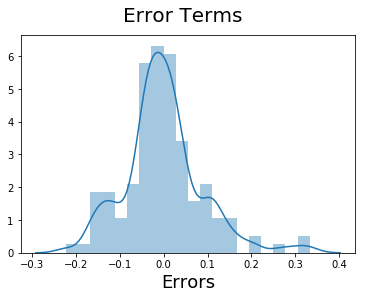

In [75]:
# Plot the histogram of the error terms.
# Normalized graph around 0 should be created
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 5: Prediction and evaluation on the test set.

### Using model predicted. Run it on test set and identify y_test_price

### Step 5a: Apply scaler minmax to test dataframe.

In [76]:
# Apply scaler() to all the columns of car_df_test dataframe.

car_df_test[num_vars] = scaler.fit_transform(car_df_test[num_vars])
car_df_test.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi
105,1.00,0.0,0.162069,0.450000,0.518987,0.081818,0.606035,0.5,0.569832,0.635714,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
100,0.25,1.0,0.365517,0.496552,0.177215,0.536364,0.250319,0.0,0.229050,0.564286,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
175,0.00,1.0,0.544828,0.534483,0.341772,0.463636,0.297918,0.0,0.240223,0.550000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
98,0.75,0.0,0.293103,0.306897,0.000000,0.409091,0.125372,0.0,0.100559,0.435714,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
77,0.75,0.0,0.244828,0.218966,0.075949,0.181818,0.098173,0.0,0.072626,0.307143,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Step 5b: Dividing into X_test and y_test

In [77]:
y_test = car_df_test.pop('price')
X_test = car_df_test

### Step 5c: Start mapping test dataframe to train dataframe.

In [78]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

### Step 5d: Start predicting

In [79]:
# Making predictions
y_test_pred = lm.predict(X_test_new)

### Step 5e: Evaluate model using test dataset.

In [80]:
# evaluate the model
from sklearn.metrics import r2_score

r2_score(y_true=y_test,y_pred=y_test_pred)

0.7998477203983654

Text(0, 0.5, 'y_pred')

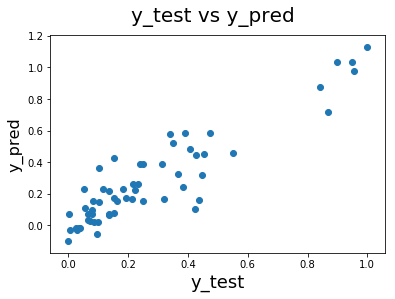

In [81]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## Thus the value of predictive method for test is ~80% which is very near for train data ~82%

### Variable           			Coefficient


enginesize                   1.1248

enginelocation_rear          0.4339

carbody_hardtop             -0.1234

carbody_hatchback           -0.0560

drivewheel_rwd               0.1040

enginetype_ohc               0.0603